# Session 8

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Linear Regression
- Read the data
- Create a train test split
- Use 75% rows for training, 15% for testing
- Use statsmodel OLS to train the regressor on the train set.
- Report the RMSE on the train and test splits.

In [ ]:
url = "https://raw.githubusercontent.com/Armagaan/"\
        "Data-Analytics-with-Python/main/week-8/advertising.csv"

df = pd.read_csv(url, header=0)
df.head(10)

,TV,Radio,Sales
0,0.7,39.6,1.6
1,4.1,11.6,3.2
2,8.6,2.1,4.8
3,13.1,0.4,5.3
4,5.4,29.9,5.3
5,7.3,28.1,5.5
6,13.2,15.9,5.6
7,8.4,27.2,5.7
8,17.2,4.1,5.9
9,7.8,38.9,6.6


In [ ]:
# train/test split

# shuffle
df = df.sample(frac=1., replace=False, random_state=0).reset_index(drop=True)

# 75% of rows for training
split_idx = int(len(df) * 0.75)

x_train = df.drop("Sales", axis=1).iloc[:split_idx].values
x_test = df.drop("Sales", axis=1).iloc[split_idx:].values

y_train = df.Sales.iloc[:split_idx].values
y_test = df.Sales.iloc[split_idx:].values

$$a 1 + b x_1 + c x_2$$

In [ ]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [ ]:
model = sm.OLS(endog=y_train, exog=x_train)
results = model.fit()

In [ ]:
results.params

array([4.81664885, 0.05383248, 0.10388318])

In [ ]:
def cal_rmse(x: np.array, y: np.array):
    x = x.ravel()
    y = y.ravel()
    return np.sqrt(((x - y) ** 2).mean())

In [ ]:
# rmse

# train
pred_train = results.predict(x_train)
print(f"rmse train: {cal_rmse(pred_train, y_train):.4f}")

# test
pred_test = results.predict(x_test)
print(f"rmse test: {cal_rmse(pred_test, y_test):.4f}")

rmse train: 1.6321
rmse test: 1.6900


## Visualize the regression plane

In [ ]:
intercept = results.params[0]
c0, c1 = results.params[1], results.params[2]

x_range = np.linspace(0, 300, 100)
y_range = np.linspace(0, 60, 100)
X, Y = np.meshgrid(x_range, y_range)

Z = c0 * X + c1 * Y + intercept

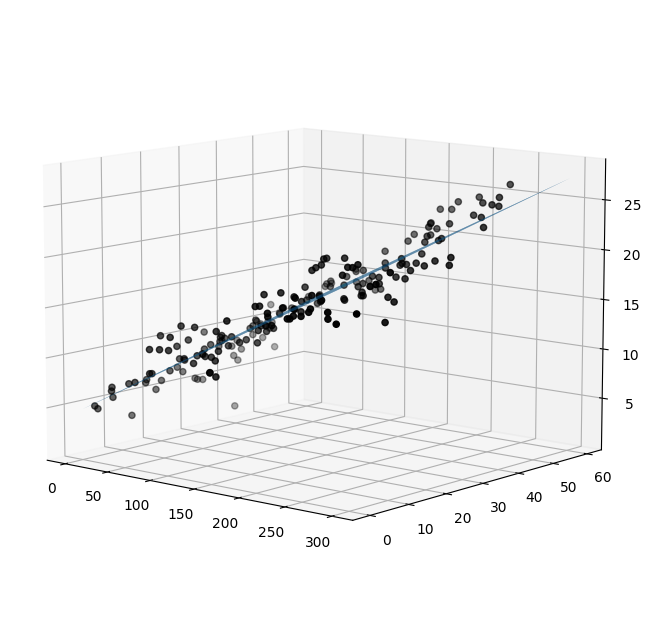

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(X, Y, Z)
ax.scatter(xs=df.TV, ys=df.Radio, zs=df.Sales, color="black")

ax.view_init(azim=-50, elev=10)

plt.show()

## Visualize using Plotly

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(
    data=[go.Surface(z=Z, x=x_range, y=y_range, colorscale="burg")]
)
fig.add_scatter3d(
    x=df.TV,
    y=df.Radio,
    z=df.Sales,
    mode="markers",
    marker={"size": 3, "color": "black"}
)

fig.update_layout(
    width=700,
    height=700,
)

fig.show()

# Logistic Regression
- Load the data
- Setup datasets for One vs All classification
- Train statsmodels Logit models

In [ ]:
url = "https://raw.githubusercontent.com/Armagaan/"\
        "Data-Analytics-with-Python/main/week-8/IRIS.csv"

df = pd.read_csv(url, header=0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# one vs all
# Setosa or not setosa
df_setosa = df.copy(deep=True)
df_setosa.species = df_setosa.species.apply(
    lambda x: 1 if x == "Iris-setosa" else 0
)
df_setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(
    df_setosa.drop("species", axis=1).values,
    df_setosa.species.values,
    random_state=0,
    stratify=df_setosa.species
)

# add constant
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# model = ...
model = sm.Logit(endog=y_train, exog=x_train)
# fit the model
results = model.fit()

In [ ]:
results.params

array([ -7.00018267,   8.46679886,   7.98095887, -19.16606286,
       -16.5683245 ])

In [ ]:
# make predictions
pred_train = results.predict(x_train)
pred_train = (pred_train >= 0.5).astype(int)
pred_train

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1])

In [ ]:
acc = (y_train == pred_train).sum() / len(y_train)
print(acc)

1.0


## Versicolor

In [ ]:
# one vs all
# Setosa or not setosa
df_versi = df.copy(deep=True)
df_versi.species = df_versi.species.apply(
    lambda x: 1 if x == "Iris-versicolor" else 0
)
df_versi.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(
    df_versi.drop("species", axis=1).values,
    df_versi.species.values,
    random_state=0,
    stratify=df_versi.species
)

# add constant
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# model = ...
model = sm.Logit(endog=y_train, exog=x_train)
# fit the model
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.480016
         Iterations 6


In [ ]:
# make predictions
pred_train = results.predict(x_train)
pred_train = (pred_train >= 0.5).astype(int)
pred_train

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1])

In [ ]:
y_train

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1])

In [ ]:
acc = (y_train == pred_train).sum() / len(y_train)
print(acc)

0.7410714285714286
